## Nursery Dataset Multiclass Classification
Here we can see MWEM shine on a Multiclass classification problem when the data is purely categorical. The synthetic data performs quite comparably to the original dataset, and way outperforms random guessing.

We can also note that the striking overlap between the synthetic data and the real data in the TSNE plot.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import RidgeClassifier

import utils

from opendp.whitenoise.synthesizers.mwem import MWEMSynthesizer

In [2]:
nursery = utils.preprocess_encode('datasets/nursery.csv')
nf = nursery.to_numpy()

In [3]:
synth = MWEMSynthesizer(1000, 3.0, 50, 20, split_factor=8, max_bin_count=400)
synth.fit(nf)

Initializing iteration with columns [0 1 2 3 4 5 6 7]
Estimate duration till completion: 0.0 seconds (lower bound)


In [4]:
sample_size = len(nf)
synthetic = synth.sample(int(sample_size))


Trained on Real Data
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       870
           1       0.55      0.67      0.60       873
           2       0.00      0.00      0.00         2
           3       0.56      0.35      0.43       785
           4       0.00      0.00      0.00        62

    accuracy                           0.67      2592
   macro avg       0.39      0.40      0.39      2592
weighted avg       0.64      0.67      0.64      2592

Accuracy real: 0.6666666666666666

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       870
           1       0.52      0.72      0.60       873
           2       0.00      0.00      0.00         2
           3       0.52      0.20      0.29       785
           4       0.00      0.00      0.00        62

    accuracy                           0.62      2592
   macro avg       0.37      0.38      0.35     

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,


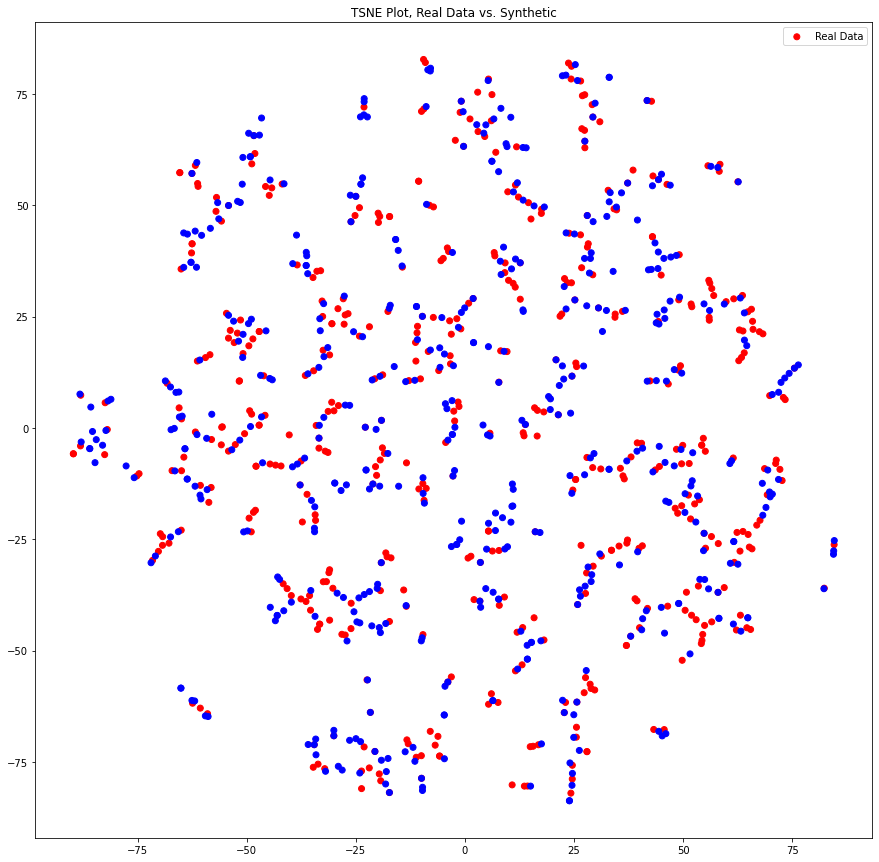

            parents      has_nurs          form      children       housing  \
count  12960.000000  12960.000000  12960.000000  12960.000000  12960.000000   
mean       2.000000      1.500000      1.500000      1.000000      0.500000   
std        1.414268      1.118077      1.118077      0.816528      0.500019   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.750000      0.750000      0.000000      0.000000   
50%        2.000000      1.500000      1.500000      1.000000      0.500000   
75%        3.000000      2.250000      2.250000      2.000000      1.000000   
max        4.000000      3.000000      3.000000      2.000000      1.000000   

            finance        social        health  
count  12960.000000  12960.000000  12960.000000  
mean       1.000000      1.000000      1.366821  
std        0.816528      0.816528      1.294212  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000     

(RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=None,
                 solver='auto', tol=0.001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=None,
                 solver='auto', tol=0.001))

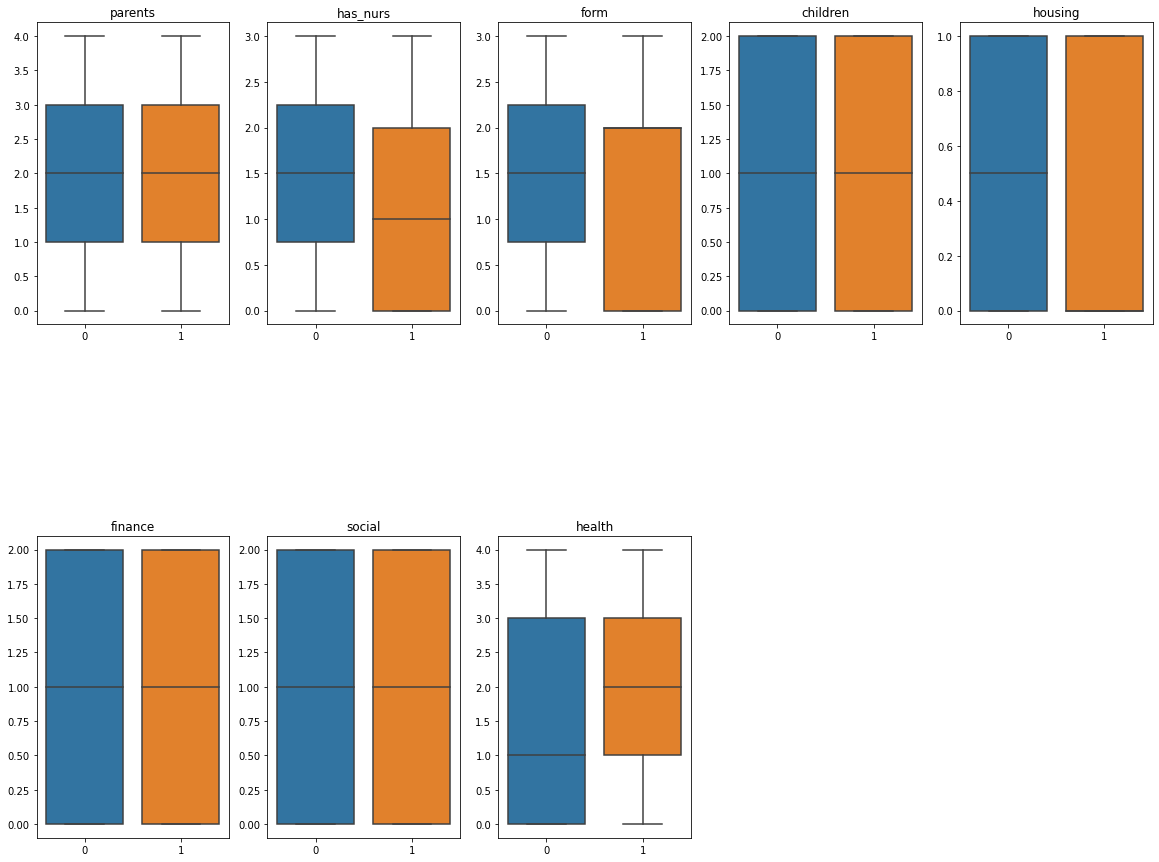

In [5]:
utils.test_real_vs_synthetic_data(nursery, synthetic, RidgeClassifier, tsne=True, box=True, describe=True)